# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [76]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [77]:
employee = pd.read_csv('Employee.csv')
employee.dtypes
employee.head()
employee.tail()

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [78]:
employee.pivot_table(index='Department', values='Salary', aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [79]:
employee.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [80]:
employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc='mean')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [81]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], columns=['Years'])
employee.pivot_table(index=['Department', 'Title'], values=['Salary', 'Years'])

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [82]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=['mean', 'count'])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [83]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=['median', 'min', 'max', 'std'])

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [84]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=['median', 'min', 'max', 'std'], fill_value=0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [85]:
employee.pivot_table(index=['Department'], values=['Name', 'Salary'], aggfunc=['count', 'sum'])

C:\Users\gdlcm\AppData\Local\Temp\ipykernel_82464\299466539.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  employee.pivot_table(index=['Department'], values=['Name', 'Salary'], aggfunc=['count', 'sum'])


count           sum
            Name Salary Salary
Department                    
HR             3      3    135
IT             4      4    195
Sales          2      2    110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [86]:
employee.pivot_table(index=['Department', 'Title'], values=['Years', 'Salary'], aggfunc=['sum', 'mean'])

sum         mean      
                     Salary Years Salary Years
Department Title                              
HR         VP            70     8   70.0   8.0
           analyst       65     6   32.5   3.0
IT         VP            70     8   70.0   8.0
           analyst       65     3   32.5   1.5
           associate     60     7   60.0   7.0
Sales      associate    110     5   55.0   2.5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [87]:
# your answer here--Your custom function here
        

In [88]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [89]:
fitbit = pd.read_csv('fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [90]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [91]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [92]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062606

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

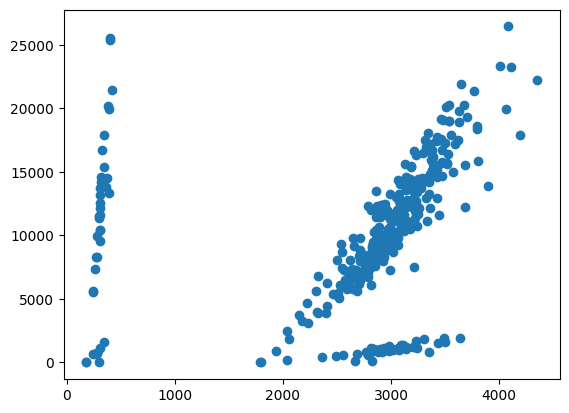

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Calorie burned'], y=fitbit['Steps']) 
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [94]:
# I CAN SAY THAT THE MORE MINUTES VERY ACTIVE THE MORE STEPS YOU TAKE DURING THE DAY 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [95]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990097

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

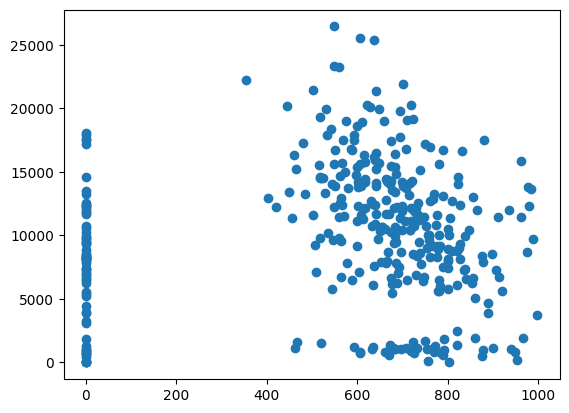

In [96]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

In [97]:
# I CAN SAY THAT THE MORE MINUTES SEDENTARY THE LESS STEPS YOU TAKE DURING THE DAY

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [98]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836388

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

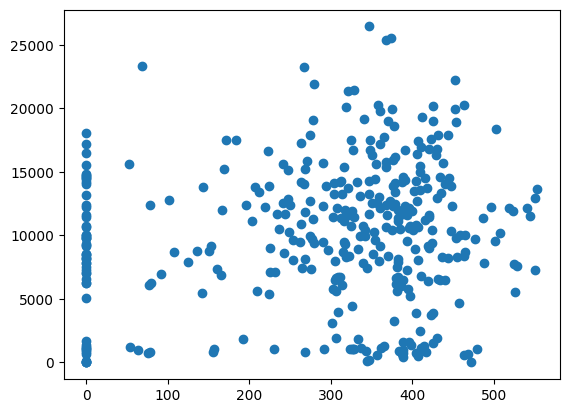

In [99]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [100]:
cor_fit = fitbit[['Steps', 'Distance', 'Floors', 'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active', 'Activity Calories']].corr()

In [101]:
print(cor_fit)

                           Steps  Distance    Floors  Minutes Sedentary  \
Steps                   1.000000  0.779678  0.306511           0.076906   
Distance                0.779678  1.000000  0.382940           0.160632   
Floors                  0.306511  0.382940  1.000000           0.057812   
Minutes Sedentary       0.076906  0.160632  0.057812           1.000000   
Minutes Lightly Active  0.393010  0.455272 -0.085992           0.217021   
Minutes Fairly Active   0.303244  0.348113  0.278408           0.084137   
Minutes Very Active     0.571452  0.759310  0.399503           0.105963   
Activity Calories      -0.160568 -0.246853 -0.155532          -0.161446   

                        Minutes Lightly Active  Minutes Fairly Active  \
Steps                                 0.393010               0.303244   
Distance                              0.455272               0.348113   
Floors                               -0.085992               0.278408   
Minutes Sedentary               

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [102]:
cor_fit['Steps'].sort_values(ascending=False)

Steps                     1.000000
Distance                  0.779678
Minutes Very Active       0.571452
Minutes Lightly Active    0.393010
Floors                    0.306511
Minutes Fairly Active     0.303244
Minutes Sedentary         0.076906
Activity Calories        -0.160568
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [103]:
time_grades = pd.read_csv('Time_Grades.csv')

In [104]:
print(time_grades)

        Name  Study time  Grade
0       Jose           4      4
1      Maria           9      7
2      David           8      9
3      Sonia          10      7
4     Samuel          20      9
5        Eva           5      3
6     Carlos          12      7
7      Pedro           6      5
8        Ana          18      9
9   Gervasio           7      3
10     Gemma           7      8
11    Alicia          11      7
12  Jonathan           2      1
13  Cristina          13      8
14     Pilar           3      2


#### Show visually the frequency distribution of the time_grades dataset.

array([[<AxesSubplot: title={'center': 'Study time'}>,
        <AxesSubplot: title={'center': 'Grade'}>]], dtype=object)

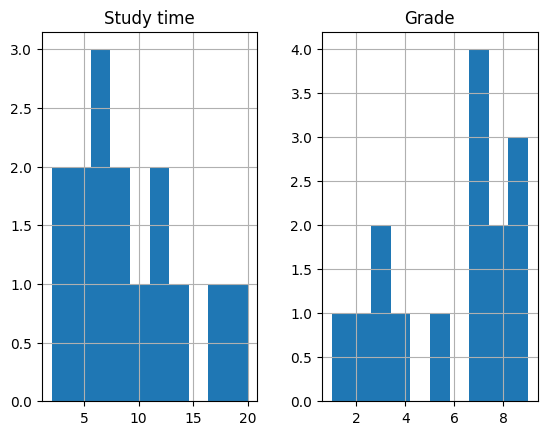

In [105]:
time_grades.hist()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [106]:
Pearson = time_grades['Study time'].corr(time_grades['Grade'])
print(Pearson)

0.7980456073578858


In [107]:
Spearman = time_grades['Study time'].corr(time_grades['Grade'], method='spearman')
print(Spearman)

0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

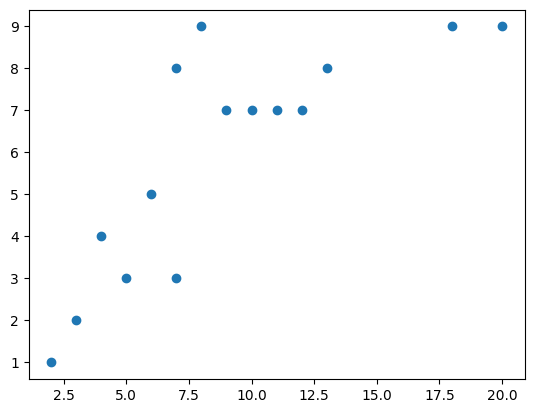

In [108]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])

In [109]:
# I CAN SAY THAT THE MORE STUDY TIME THE MORE GRADE YOU GET

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [110]:
# Pearson is a measure of the linear correlation between two variables X and Y.
# Spearman is a nonparametric measure of the monotonicity of the relationship between two variables.